# UCI ML Arrhythmia Dataset

https://archive.ics.uci.edu/ml/datasets/Arrhythmia

Wikipedia page describing different arrhythmias

https://en.wikipedia.org/wiki/Arrhythmia

In [5]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10, 6)
%matplotlib inline
from IPython.display import Image

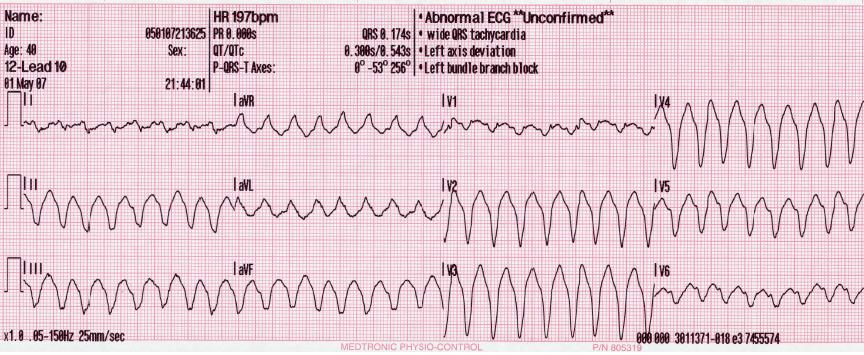

In [18]:
from IPython.display import Image
dirpath = r'C:\Users\joeba\OneDrive\Documents\ML\arrythmia'
Image(dirpath + '/12_lead_generated_ventricular_tachycardia.jpg', width=1000, height=800)

In [ ]:
#List of arrhythmias - copied from the data description
#Class code:    Class:                                       Number of instances:
#01             Normal                                       245
#02             Ischemic changes (Coronary Artery Disease)   44
#03             Old Anterior Myocardial Infarction           15
#04             Old Inferior Myocardial Infarction           15
#05             Sinus tachycardy                             13
#06             Sinus bradycardy                             25
#07             Ventricular Premature Contraction (PVC)      3
#08             Supraventricular Premature Contraction       2
#09             Left bundle branch block                     9
#10             Right bundle branch block                    50
#11             1. degree AtrioVentricular block             0
#12             2. degree AV block                           0
#13             3. degree AV block                           0
#14             Left ventricule hypertrophy                  4
#15             Atrial Fibrillation or Flutter               5
#16             Others                                       22

In [ ]:
# after doing datacamp intermediate importing data in python
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/arrhythmia/arrhythmia.data'
web = pd.read_csv(url, header=None)
web.head()

In [ ]:
web = web.replace(to_replace='?', value=np.NaN)

In [ ]:
web.isna().sum()

In [20]:
# read data file
arrhythmia = pd.read_excel("C:/Users/joeba/OneDrive/Documents/ML/arrythmia/arrhythmia.data.xlsx")
arrhythmia.head()

,Age,Sex,Height,Weight,QRS_duration,P-R_interval,Q-T_interval,T_interval,P_interval,QRS_vector_angle,...,V6_Q_wave_amplitude,V6_R_wave_amplitude,V6_S_wave_amplitude,V6_R'_wave_amplitude,V6_S'_wave_amplitude,V6_P_wave_amplitude,V6_T_wave_amplitude,V6_QRSA_area,V6_QRSTA_area,Arrhythmia
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0,-0.1,3.9,25.4,62.8,7


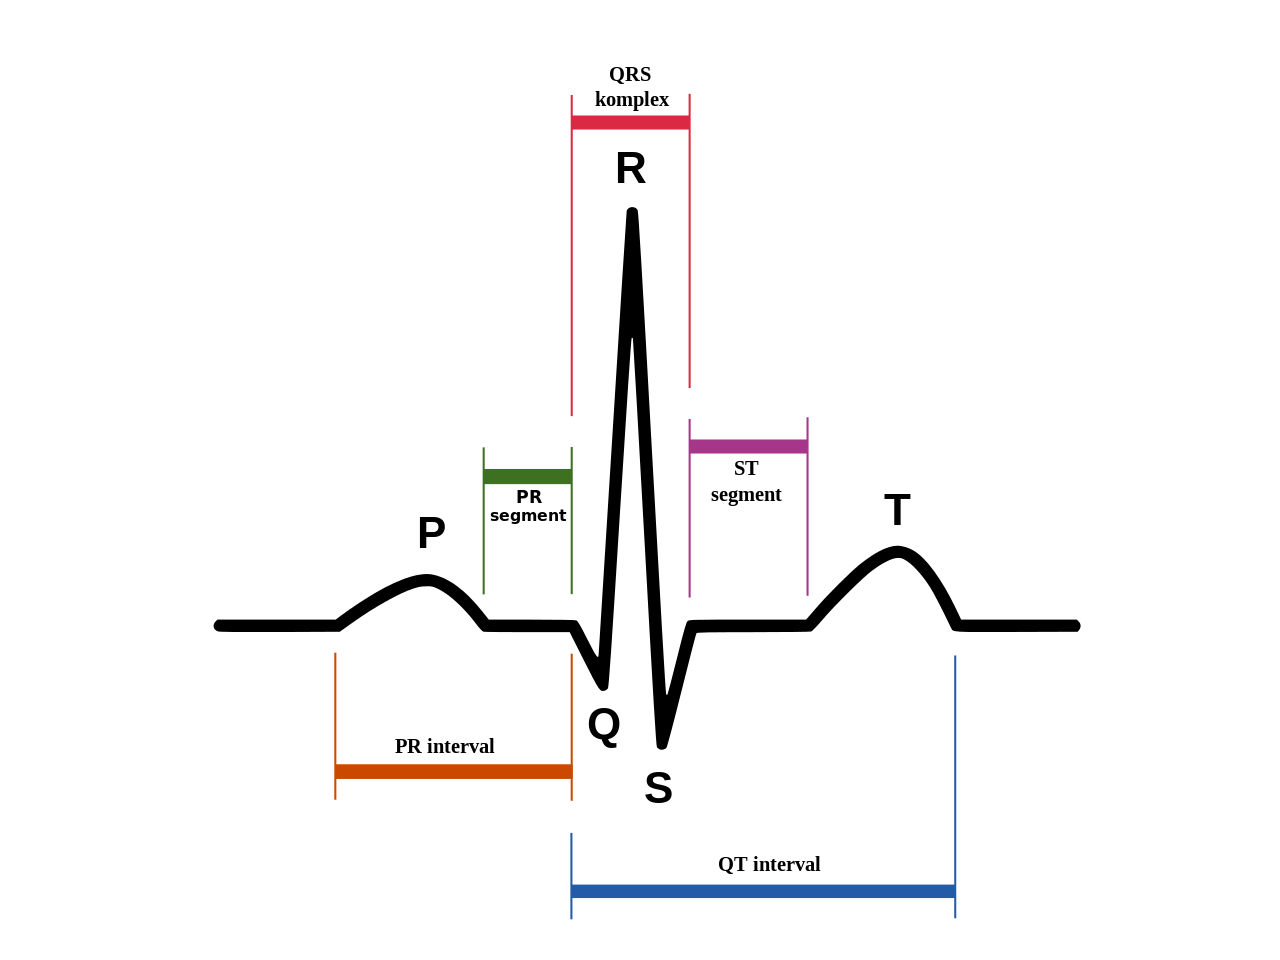

In [21]:
Image(filename = dirpath + '/ECG-PQRST.png', width=864, height=355)
# image from: https://www.wikilectures.eu/w/Electrocardiogram

In [31]:
# create a dataframe for the waveform
wf = pd.DataFrame(columns=['Milliseconds', 'Amplitude'])

arr = arrhythmia.copy()

hr = arr.loc[0, 'Heart_rate']
hb_dur_min = 1.0 / hr
hb_dur_sec = hb_dur_min * 60
hb_dur_millisec = hb_dur_sec * 1000

p_start = arr.loc[0, 'P_interval']
p_amplitude = arr.loc[0, 'DI_P_wave_amplitude']

pr_interval = arr.loc[0, 'P-R_interval']

qrs_interval = arr.loc[0, 'QRS_duration']

qt_interval = arr.loc[0, 'Q-T_interval']

q_interval = arr.loc[0, 'DI_Q_wave_width']
q_amplitude = arr.loc[0, 'DI_Q_wave_amplitude']

r_interval = arr.loc[0, 'DI_R_wave_width']
r_amplitude = arr.loc[0, 'DI_R_wave_amplitude']

s_interval = arr.loc[0, 'DI_S_wave_width']
s_amplitude = arr.loc[0, 'DI_S_wave_amplitude']

t_interval = arr.loc[0, 'T_interval']
t_amplitude = arr.loc[0, 'DI_T_wave_amplitude']

print(p_start, p_amplitude)

wf = wf.append(pd.DataFrame({'Milliseconds':0, 'Amplitude':0}, index=[len(wf)]))
wf = wf.append(pd.DataFrame({'Milliseconds':p_interval/2, 'Amplitude':[p_amplitude]}, index=[len(wf)]))
wf = wf.append(pd.DataFrame({'Milliseconds':p_interval, 'Amplitude':0}, index=[len(wf)]))

wf = wf.append(pd.DataFrame({'Milliseconds':pr_interval, 'Amplitude':0}, index=[len(wf)]))

q_interval += pr_interval
wf = wf.append(pd.DataFrame({'Milliseconds':q_interval, 'Amplitude':q_amplitude}, index=[len(wf)]))

r_interval += q_interval
wf = wf.append(pd.DataFrame({'Milliseconds':r_interval, 'Amplitude':r_amplitude}, index=[len(wf)]))

s_interval += r_interval
wf = wf.append(pd.DataFrame({'Milliseconds':s_interval, 'Amplitude':s_amplitude}, index=[len(wf)]))

s_end = pr_interval+qrs_interval
if s_end < s_interval:
    s_end = s_interval+10
wf = wf.append(pd.DataFrame({'Milliseconds':s_end, 'Amplitude':0}, index=[len(wf)]))

# estimate st_segment as half the time remaining
t_interval = s_end+t_interval
st_segment = s_end + ((t_interval - s_end) / 2)
wf = wf.append(pd.DataFrame({'Milliseconds':st_segment, 'Amplitude':0}, index=[len(wf)]))


#wf = wf.append(pd.DataFrame({'Seconds':p_interval, 'Amplitude':[p_amplitude]}, index=[len(wf)]))
t_interval = s_end+t_interval
wf = wf.append(pd.DataFrame({'Milliseconds':t_interval, 'Amplitude':t_amplitude}, index=[len(wf)]))



121 0.6


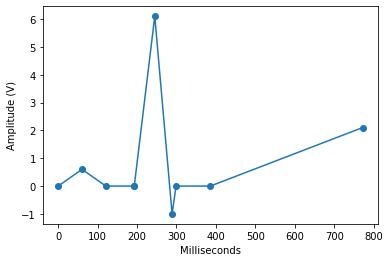

In [32]:
plt.plot(wf['Milliseconds'], wf['Amplitude'], '-o')
plt.xlabel("Milliseconds")
plt.ylabel("Amplitude (V)")
plt.show()

In [26]:
names = list(arrhythmia.columns)
names

['Age',
 'Sex',
 'Height',
 'Weight',
 'QRS_duration',
 'P-R_interval',
 'Q-T_interval',
 'T_interval',
 'P_interval',
 'QRS_vector_angle',
 'T_vector_angle',
 'P_vector_angle',
 'QPRST_vector_angle',
 'J_vector_angle',
 'Heart_rate',
 'DI_Q_wave_width',
 'DI_R_wave_width',
 'DI_S_wave_width',
 "DI_R'_wave_width",
 "DI_S'_wave_width",
 'DI_intrinsic_deflections',
 'DI_ragged_R_wave',
 'DI_diphasic_derivation_R_wave',
 'DI_ragged_P_wave',
 'DI_diphasic_derivation_P_wave',
 'DI_ragged_T_wave',
 'DI_diphasic_derivation_T_wave',
 'DII_Q_wave_width',
 'DII_R_wave_width',
 'DII_S_wave_width',
 "DII_R'_wave_width",
 "DII_S'_wave_width",
 'DII_intrinsic_deflections',
 'DII_ragged_R_wave',
 'DII_DIIphasic_derivation_R_wave',
 'DII_ragged_P_wave',
 'DII_DIIphasic_derivation_P_wave',
 'DII_ragged_T_wave',
 'DII_DIIphasic_derivation_T_wave',
 'DIII_Q_wave_width',
 'DIII_R_wave_width',
 'DIII_S_wave_width',
 "DIII_R'_wave_width",
 "DIII_S'_wave_width",
 'DIII_intrinsic_deflections',
 'DIII_ragged_R

In [ ]:
sns.countplot(x='Arrhythmia', data=arrhythmia)

In [ ]:
# replace the ? marks with NaN
arrhythmia = arrhythmia.replace(to_replace='?', value=np.NaN)
print(arrhythmia.iloc[66, 10])
arrhythmia.describe()

In [ ]:
arrhythmia.isna().sum()

In [ ]:
# find and eliminate near zero sum columns in the data
def colCount(dataset):
    
    col_count = []
    for i in range(len(dataset.columns)):
        
        cs = 0
        
        for j in range(len(dataset)):
            cs = cs+dataset.iloc[j,i]
            
        col_count.append(cs)
        
    return col_count

cols = colCount(arrhythmia)

In [ ]:
# drop columns with no or very little information
drop_threshold = 100
drop_cols = []
for i in range(len(cols)):
    if abs(cols[i]) <= drop_threshold:
        drop_cols.append(arrhythmia.columns[i])
        
arrhythmia = arrhythmia.drop(labels=drop_cols,axis=1)
arrhythmia

In [ ]:
# find and eliminate correlated columns in the data
def correlated(dataset, threshold=0.8):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return list(col_corr)

cor_cols = correlated(arrhythmia,0.8)

arrhythmia = arrhythmia.drop(labels=cor_cols,axis=1)
arrhythmia

In [ ]:
arrhythmia.shape

In [ ]:
fig = plt.figure(1, figsize=(9, 2))
sns.catplot(y='Age', data=arrhythmia, kind='box', whis=[0,100], col='Arrhythmia')
plt.show()

In [ ]:
# looking for anomalies in height and weight
def plotArrhythmia():
    plt.figure(figsize=(16,8))
    plt.title('Arrhythmia height / weight')
    plt.scatter(x=arrhythmia['Height'], y=arrhythmia['Weight'], c=arrhythmia['Arrhythmia'], s=(1+arrhythmia['Age']))
    plt.xlabel('Height (cm)', fontsize=12)
    plt.ylabel('Weight (kg)', fontsize=12)
    #plt.legend(arrhythmia['Arrhythmia'])
    plt.show()

plotArrhythmia()

In [ ]:
# show the rows with heights > 600
arrhythmia.loc[arrhythmia['Height'] > 600]

In [ ]:
# by their age, both are clearly babies / toddlers
arrhythmia.at[141, 'Height'] = 78.0
arrhythmia.at[316, 'Height'] = 60.8
arrhythmia.iloc[141]['Height'], arrhythmia.iloc[316]['Height']
# re-run the scatter plot
plotArrhythmia()

In [ ]:
# show the rows with weights < 20
arrhythmia.loc[arrhythmia['Weight'] < 20]

In [ ]:
# 58 year old female 186 high, weighing in at only 18kg ??? - and who has a normal heart rhythm???
#arrhythmia.at[126, 'Weight'] = 78.0
arrhythmia = arrhythmia.drop(index=126,axis=0)
# re-run the scatter plot
plotArrhythmia()

In [ ]:
# show the very heavy individual - shows a 53 yr old female - with coronary artery disease - typo?
arrhythmia.loc[arrhythmia['Weight'] > 170]

In [ ]:
# let's assume that that is a transcription error from handwritten notes
arrhythmia.at[213, 'Weight'] = 116.0
# re-run the scatter plot
plotArrhythmia()

In [ ]:
arrhythmia.to_csv('C:/Users/joeba/OneDrive/Documents/ML/arrythmia/arrhythmia.cleaned.csv', index=False)

In [ ]:
arrhythmia.columns.to_list()

In [ ]:
# Make a list of the column names to be plotted: cols
cols = ['QRS_duration','P-R_interval','Q-T_interval','T_interval','P_interval']

# Generate the box plots
arrhythmia[cols].plot(kind='box', subplots=True)

# Display the plot
plt.show()

In [ ]:
fig = plt.figure(1, figsize=(16, 8))
arrhythmia.boxplot(column='V1_S_wave_amplitude', by='Arrhythmia')
plt.show()

In [ ]:
# sinus tachycardia & bradycardia
# https://en.wikipedia.org/wiki/Sinus_tachycardia
sinus_tachy = arrhythmia.loc[arrhythmia['Arrhythmia'] == 5]
sinus_brady = arrhythmia.loc[arrhythmia['Arrhythmia'] == 6]
                            
s_tachy = np.array(sinus_tachy['Heart_rate'])
s_brady = np.array(sinus_brady['Heart_rate'])

# expect tachy to have HR > 100, brady < 60
all_data = [s_tachy, s_brady]
fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)
bp = ax.boxplot(all_data,patch_artist=True,labels=['S Tachy','S Brady'])

plt.show()

In [ ]:
# split into data and classes
X = arrhythmia.iloc[:, 0:118].values
x = arrhythmia.iloc[:, 0:118].columns
Y = arrhythmia.iloc[:, 119].values
Y

In [ ]:
# get counts of each label class - data is considerably imbalanced
def labelCounts(labels):
    counts_dict = {}
    mL = 0
    
    for i in range(len(labels)):
        # iterate through labels and add to counts_dict
        if labels[i] not in counts_dict:
            counts_dict[labels[i]] = 1
        else:
            counts_dict[labels[i]] = counts_dict[labels[i]]+1
        
        # get the max value of label
        if labels[i] >= mL:
            mL = labels[i]
            
    #arr_counts = []
    #for j in range(mL):
    #    arr_counts.append(0)
    
    
    #for j in range(mL):
    #    if j in counts_dict:
    #        arr_counts[j] = counts_dict[j]
        
    #return arr_counts[1:mL]
    return counts_dict

arrhythmia_dict = labelCounts(Y)

#np.sum(arr_counts[1:17])

In [ ]:
arrhythmia['Arrhythmia'].value_counts()

In [ ]:
# scale the data assuming that there will be outliers in the data 
from sklearn import preprocessing
#X = preprocessing.robust_scale(X)
X = preprocessing.scale(X)

In [ ]:
# training test set split - 80% being used to train and (default) ensuring even stratification of output in test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
y_test

In [ ]:
from sklearn import svm
#svc = svm.SVC(class_weight={1: 10}, decision_function_shape='ovo', kernel='linear')

#svc = svm.SVC()
#svc = svm.SVC(decision_function_shape='ovo')
svc = svm.SVC(gamma='scale', class_weight='balanced', decision_function_shape='ovr', kernel='linear')
#svc = svm.SVC(gamma='scale', class_weight='balanced', decision_function_shape='ovo')
#svc = svm.SVC(gamma='scale', class_weight='balanced', decision_function_shape='ovo', kernel='rbf')
#svc = svm.SVC(gamma='scale', decision_function_shape='ovo', kernel='linear')
svc.fit(X_train, y_train)

In [ ]:
# evaluate the performance of the SVM
y_pred = svc.predict(X_test)
y_pred

In [ ]:
yt_dict = labelCounts(y_test)
yt_dict

In [ ]:
yp_dict = labelCounts(y_pred)
yp_dict

In [ ]:
# make the multilabel confusion matrix
cm = np.zeros((len(y_test), len(y_pred)), dtype=int)

for i in range(len(y_test)):
    cm[y_test[i],y_pred[i]] = cm[y_test[i],y_pred[i]]+1

# slice off the zero index
cm = cm[1:17,1:17]
cm

In [ ]:
# what was the accuracy of our prediction on the test set?
#accuracy = np.sum((np.identity(cm.shape[1])*cm)) / np.sum(cm)
svc.score(X_test, y_test) # could also get the value from the svm itself
#accuracy

In [ ]:
# determine performance by class
diag = []
for i in range(cm.shape[0]):
    diag.append(cm[i,i])
    
test = []
pred = []

for i in range(1,17):
    test.append(yt_dict.get(i,0))
    pred.append(yp_dict.get(i,0))

print(test)
print(pred)
print(diag)

In [ ]:
# display the performance by class
def plotPerformanceByClass(title):
    labels = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]

    x = np.arange(len(labels))  # the label locations
    width = 0.25  # the width of the bars

    fig, ax = plt.subplots(figsize=(16,8))
    rects1 = ax.bar(x - width, test, width, label='Test')
    rects2 = ax.bar(x, pred, width, label='Predicted')
    rects3 = ax.bar(x + width, diag, width, label='Correct')

    ax.set_xticks(x)
    ax.set_xticklabels(labels)

    ax.legend()

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Scores')
    ax.set_title(title)

    #fig.tight_layout()

    plt.show()
    
plotPerformanceByClass('Scores by class')

In [ ]:
# reduce to binary classification - arrhythmia or not arrhythmmia
def binaryAccuracyPrecisionRecall(conmat):
    cm_binary = np.zeros((2, 2), dtype=int)
        
    # TP and TN relatively easy
    cm_binary[0,0] = conmat[0,0]
    
    diag = []
    for i in range(conmat.shape[0]):
        diag.append(conmat[i,i])
    
    cm_binary[1,1] = np.sum(diag)-conmat[0,0]

    # FP is the sum of col 0, less the TP
    for i in range(len(conmat)):
        cm_binary[0,1] = cm_binary[0,1] + conmat[i,0]
    cm_binary[0,1] = cm_binary[0,1] - cm_binary[0,0]

    # FN - sum of cm, less the cm_binary values
    cm_binary[1,0] = np.sum(conmat) - (cm_binary[0,0] + cm_binary[1,1] + cm_binary[0,1])
    
    # show & summary scores
    print(cm_binary)

    print("binary accuracy   : ", (cm_binary[0,0] + cm_binary[1,1]) / np.sum(cm_binary))
    print("binary precision  : ", cm_binary[0,0] / (cm_binary[0,0] + cm_binary[0,1]))
    print("binary recall     : ", cm_binary[0,0] / (cm_binary[0,0] + cm_binary[1,0]))

binaryAccuracyPrecisionRecall(cm)

In [ ]:
# eliminate from the original (cleaned) data any classes with less than 10 instances
def setA2(arrhythmia):
    arrhythmia2 = arrhythmia.loc[arrhythmia['Arrhythmia'] != 7]
    arrhythmia2 = arrhythmia2.loc[arrhythmia2['Arrhythmia'] != 8]
    arrhythmia2 = arrhythmia2.loc[arrhythmia2['Arrhythmia'] != 9]
    arrhythmia2 = arrhythmia2.loc[arrhythmia2['Arrhythmia'] != 14]
    arrhythmia2 = arrhythmia2.loc[arrhythmia2['Arrhythmia'] != 15]
    
    return arrhythmia2

def printA2Counts(arrhythmia2):
    print(arrhythmia2['Arrhythmia'].value_counts().to_list())
    print(np.min(arrhythmia2['Arrhythmia'].value_counts().to_list()))

arrhythmia2 = setA2(arrhythmia)
printA2Counts(arrhythmia2)

In [ ]:
# dictionaries to keep scores
accuracy_oversample = {
    20 : [], 30 : [], 40 : [], 50 : [], 60 : [], 70 : [], 80 : [], 90 : [], 100 : [], 110 : [], 120 : [], 130 : [], 140 : [], 150 : []
}

accuracy_original = {
    20 : [], 30 : [], 40 : [], 50 : [], 60 : [], 70 : [], 80 : [], 90 : [], 100 : [], 110 : [], 120 : [], 130 : [], 140 : [], 150 : []
}

In [ ]:
# simple randomised over sampling
# https://en.wikipedia.org/wiki/Oversampling_and_undersampling_in_data_analysis

import random

def oversample(min_level, arrhythmia2):

    while np.min(arrhythmia2['Arrhythmia'].value_counts().to_list()) < min_level:
        #print(arrhythmia2.shape)
        i = random.randint(0,len(arrhythmia2)-1)
        #print(i)
        #print(arrhythmia2.iloc[i]['Arrhythmia'])
        if((len(arrhythmia2.loc[arrhythmia2['Arrhythmia'] == arrhythmia2.iloc[i]['Arrhythmia']])) < min_level):
            #print('found a record to add with replacement')
            arrhythmia2 = arrhythmia2.append(arrhythmia2.iloc[i], ignore_index=True)
        #else:
            #print('got enough of these already')
    
    return arrhythmia2



In [ ]:
# for each level
for lvl in range(20, 151, 10):
    
    accuracy_oversample[lvl].clear()
    accuracy_original[lvl].clear()
    
    print("oversampling data to level = " + str(lvl))
    
    for t in range(0,10):
        
        # reset trial data from THE original data
        arrhythmia2 = setA2(arrhythmia)
        
        # oversample 
        arrhythmia2 = oversample(lvl, arrhythmia2)
        #printA2Counts(arrhythmia2)

        # split arrhythmia2 into data and classes
        X2 = arrhythmia2.iloc[:, 0:118].values
        x2 = arrhythmia2.iloc[:, 0:118].columns
        Y2 = arrhythmia2.iloc[:, 119].values
        #Y2
    
        # scale the data
        X2 = preprocessing.scale(X2)
    
        # training test set split - 80% being used to train and (default) ensuring even stratification of output in test set
        X2_train, X2_test, y2_train, y2_test = train_test_split(X2, Y2, test_size=0.2, random_state=1)
        svc.fit(X2_train, y2_train)
    
        # evaluate the performance of the SVM trained on oversampled data
        y2_pred = svc.predict(X2_test)
        accuracy_oversample[lvl].append(svc.score(X2_test, y2_test))
    
        # evaluate the performance of the SVM trained on oversampled data BUT on the ORIGINAL test data
        y_pred = svc.predict(X_test)
        accuracy_original[lvl].append(svc.score(X_test, y_test))

In [ ]:
# get and plot the accuracies at different levels of oversampling
accuracies_oversampled = []
accuracies_original = []
for i in range(20,151,10):
    accuracies_oversampled.append(np.average(accuracy_oversample[i]))
    accuracies_original.append(np.average(accuracy_original[i]))

levels = [20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150]

oversampled_trend = np.linspace(accuracies_oversampled[0], accuracies_oversampled[-1], len(levels))
original_trend = np.linspace(accuracies_original[0], accuracies_original[-1], len(levels))

plt.figure(figsize=(16,8))
#plt.title('Oversampling performance - average of 10 trials')
plt.xticks(levels)
plt.plot(levels, accuracies_oversampled)
plt.plot(levels,oversampled_trend)
plt.plot(levels,accuracies_original)
plt.plot(levels,original_trend)
plt.ylabel('Accuracy')
plt.xlabel('Oversampling level')

plt.show()

In [ ]:
oversampled_trend = np.linspace(accuracies_oversampled[0], accuracies_oversampled[-1], 13)
oversampled_trend

In [ ]:
# make the multilabel confusion matrix
yt2_dict = labelCounts(y2_test)
yp2_dict = labelCounts(y2_pred)

cm2 = np.zeros((17, 17), dtype=int)

for i in range(len(y2_test)):
    #print(int(y2_test[i]))
    cm2[int(y2_test[i]),int(y2_pred[i])] = cm2[int(y2_test[i]),int(y2_pred[i])]+1

# slice off the zero index
cm2 = cm2[1:17,1:17]
cm2

In [ ]:
# determine performance by class
diag2 = []
for i in range(cm2.shape[0]):
    diag2.append(cm2[i,i])
    
test2 = []
pred2 = []

for i in range(1,17):
    test2.append(yt2_dict.get(i,0))
    pred2.append(yp2_dict.get(i,0))

print(test2)
print(pred2)
print(diag2)

In [ ]:
# display the performance by class
labels2 = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]

x2 = np.arange(len(labels2))  # the label locations
width = 0.25  # the width of the bars

fig2, ax2 = plt.subplots(figsize=(16,8))
rects1 = ax2.bar(x2 - width, test2, width, label='Test')
rects2 = ax2.bar(x2, pred2, width, label='Predicted')
rects3 = ax2.bar(x2 + width, diag2, width, label='Correct')

ax2.set_xticks(x2)
ax2.set_xticklabels(labels2)

ax2.legend()

# Add some text for labels, title and custom x-axis tick labels, etc.
ax2.set_ylabel('Scores')
ax2.set_title('Scores by class (oversampled data)')

#fig.tight_layout()

plt.show()

In [ ]:
print(cm2)
binaryAccuracyPrecisionRecall(cm2)